In [146]:
import scipy.io as si
import numpy as np
import matplotlib.pyplot as plt

#load dataset
File = si.loadmat('ex8_movies.mat')

#  Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies on  943 users
Y = File['Y']

# R is a 1682x943 matrix, where R(i,j) = 1 if and only if user j gave a rating to movie i
R = File['R']

#load features X and parameters (Theta) of Users
File_2 = si.loadmat('ex8_movieParams.mat')
X = File_2['X']
Theta = File_2['Theta']

In [147]:
print('Average rating for movie 1 (Toy Story): ',Y[0][np.where(R[0] == 1)].mean())

Average rating for movie 1 (Toy Story):  3.8783185840707963


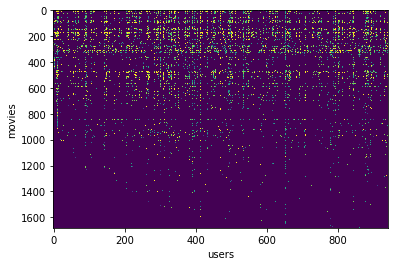

In [148]:
plt.imshow(Y, aspect = 'auto')
plt.xlabel('users')
plt.ylabel('movies')
plt.show()

# Collaborative Filtering Cost Function

In [172]:
num_users = 4
num_movies = 5
num_features = 3;

X_test = X[0:num_movies,0:num_features]
Y_test = Y[0:num_movies,0:num_users]
Theta_test = Theta[0:num_users,0:num_features]
R_test = R[0:num_movies,0:num_users]

#Cost Function
def cofiCostFunc(params, Y, R, num_users, num_movies,num_features, lamda):
    
    #Extract Feature Matrix (X) and Weights (Theta) from params
    X = params[0:num_movies*num_features].reshape(num_movies,num_features)
    Theta = params[num_movies*num_features:].reshape(num_users,num_features)
    
    #compute Regularization Term for Theta
    #Reg_Theta = (lamda/2)*(np.sum(Theta**2))
    
    #compute Regularization Term for X
    #Reg_X = (lamda/2)*(np.sum(X**2))
    
    #compute Cost
    temp = (np.multiply((np.dot(X,Theta.T)),R) -  Y)
    J = (np.sum(temp**2)/2) + (lamda/2)*((np.sum(Theta**2)) + (np.sum(X**2)))
    
    #compute Theta_grad
    Theta_grad = np.dot(X.T,temp).T  + lamda*(Theta)

    #compute X_grad
    X_grad = np.dot(temp,Theta) + lamda*(X)
    
    #merge 
    grad = np.concatenate((X_grad.ravel(),Theta_grad.ravel()))
    return J , grad 

#merge X_test and Theta_test into a column vector params
params = np.concatenate((X_test.ravel(),Theta_test.ravel()))

lamda = 1.5
J ,grad = cofiCostFunc(params, Y_test.copy(), R_test.copy(), num_users, num_movies,num_features, lamda)

print(J , grad ,'\n')

31.34405624427422 [ -0.95596339   6.97535514  -0.10861109   0.60308088   2.77421145
   0.25839822   0.12985616   4.0898522   -0.89247334   0.29684395
   1.06300933   0.66738144   0.60252677   4.90185327  -0.19747928
 -10.13985478   2.10136256  -6.76563628  -2.29347024   0.48244098
  -2.99791422  -0.64787484  -0.71820673   1.27006666   1.09289758
  -0.40784086   0.49026541] 



# Collaborative Filtering Gradient

In [150]:
def computeNumericalGradient(Jcost , params_t):
    
    params_t = params_t.reshape(len(params_t),1)
    num_grad = np.zeros((params_t.shape[0],params_t.shape[1]))
    perturb = np.zeros((params_t.shape[0],params_t.shape[1]))
    e = 1e-4;

    for p in range(params.shape[0]):
        
        #Set perturbation vector
        perturb[p] = e;
        loss1 , a = Jcost(params_t-perturb)
        loss2  , b = Jcost(params_t+perturb)
        
        #Compute Numerical Gradient
        num_grad[p] = (loss2 - loss1) / (2*e);
        perturb[p] = 0;
    
    return num_grad

def CheckCostFunction(lamda_t):
    
    # Create small problem
    X_t = np.random.random((4, 3))
    Theta_t = np.random.random((5, 3))

    # Zap out most entries
    Y_t = np.dot(X_t,Theta_t.T)
    Y_t[np.random.rand(Y_t.shape[0],Y_t.shape[1]) > 0.5] = 0
   

    R_t = np.zeros((Y_t.shape[0],Y_t.shape[1]))
    R_t[Y_t!=0] = 1
    

    #Run Gradient Checking
    X_tt = np.random.randn(X_t.shape[0],X_t.shape[1])
    

    Theta_tt = np.random.randn(Theta_t.shape[0],Theta_t.shape[1])
    

    num_users_t = Y_t.shape[1]
    num_movies_t = Y_t.shape[0]
    num_features_t = Theta_t.shape[1]

    #rolling X_tt and Theta_tt into params
    params_t = params = np.concatenate((X_tt.ravel(),Theta_tt.ravel()))


    #compute numerical Gradient
    num_grad = computeNumericalGradient(lambda t : cofiCostFunc(t, Y_t, R_t, num_users_t, num_movies_t,num_features_t, lamda_t),params_t)

    #compute Gradient using Cost Function
    J_t , grad_t = cofiCostFunc(params_t, Y_t, R_t, num_users_t, num_movies_t,num_features_t, lamda_t)
    
    print('    num_grad ' ,num_grad.ravel())
    print( '    grad_t',grad_t)
    
    
    diff = np.sum(num_grad - grad_t)/np.sum(num_grad + grad_t)
    print('\n' , 'difference : ', diff)
    
CheckCostFunction(1.5)
    

    num_grad  [-0.47781589  6.71141926  6.73478607  0.65981406 -0.90704868 -4.01169456
  1.41064851 -0.17943807 -2.12655429 -1.62696888  3.44749736  0.92910973
 -3.6474361  -1.34000232  1.21989515  1.59466575 -2.16566161 -6.56422996
 -0.7086322  -3.27592192 -1.77191058  1.21323963 -0.79928761 -1.35263466
  1.58130532 -4.29220012 -1.9318926 ]
    grad_t [-0.47781589  6.71141926  6.73478607  0.65981406 -0.90704868 -4.01169456
  1.41064851 -0.17943807 -2.12655429 -1.62696888  3.44749736  0.92910973
 -3.6474361  -1.34000232  1.21989515  1.59466575 -2.16566161 -6.56422996
 -0.7086322  -3.27592192 -1.77191058  1.21323963 -0.79928761 -1.35263466
  1.58130532 -4.29220012 -1.9318926 ]

 difference :  -3.4051678029110364e-12


# Entering ratings for a new user

In [151]:
import re #use to call rstrip function which removes \n from a string

def loadMovielist():
    
    #open file
    text_file = open("movie_ids.txt", "r",encoding="ISO-8859-1")

    movielist = list()
    
    #Read line
    for i in text_file.readlines():
        
        #Word Index (can ignore since it will be = index in movielist)
        idx ,t = i.split(' ',1)
        
        #Actual Word
        movielist.append(t.rstrip())
    
    return movielist

movielist = loadMovielist()
print(movielist[0])

Toy Story (1995)


In [152]:
#Initialize my ratings
my_ratings = np.zeros((len(movielist), 1))

#We have selected a few movies we liked / did not like and the ratings we gave are as follows:
my_ratings[0] = 4
my_ratings[97] = 2
my_ratings[6] = 3
my_ratings[11]= 5
my_ratings[53] = 4
my_ratings[63]= 5
my_ratings[65]= 3
my_ratings[68] = 5
my_ratings[182] = 4
my_ratings[225] = 5
my_ratings[354]= 5

print('New user ratings : \n')
indexes = np.where(my_ratings > 0)[0]
print(np.concatenate((my_ratings[indexes],(np.array([movielist])).T[indexes]),axis = 1))

New user ratings : 

[['4.0' 'Toy Story (1995)']
 ['3.0' 'Twelve Monkeys (1995)']
 ['5.0' 'Usual Suspects, The (1995)']
 ['4.0' 'Outbreak (1995)']
 ['5.0' 'Shawshank Redemption, The (1994)']
 ['3.0' 'While You Were Sleeping (1995)']
 ['5.0' 'Forrest Gump (1994)']
 ['2.0' 'Silence of the Lambs, The (1991)']
 ['4.0' 'Alien (1979)']
 ['5.0' 'Die Hard 2 (1990)']
 ['5.0' 'Sphere (1998)']]


# Learning Movie Ratings

In [174]:
#load data
File_2 = si.loadmat('ex8_movies.mat')
Y_movie = File_2['Y']
R_movie = File_2['R']

# Add our own ratings to the data matrix
Y_movie = np.concatenate((Y_movie,my_ratings),axis = 1)

R_my_ratings = np.zeros(my_ratings.shape)
R_my_ratings[my_ratings!=0] = 1

R_movie = np.concatenate((R_movie,R_my_ratings),axis = 1)
print(R_movie)

[[1. 1. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Normalize Ratings

In [165]:
def normalizeRatings(y,r):
    Y_mean = np.sum(y,axis = 1)/(np.count_nonzero(y,axis = 1))
    Y_norm = y - Y_mean.reshape(len(Y_mean),1)
        
    return Y_mean,Y_norm

# Normalize Ratings
Ymean , Ynorm = normalizeRatings(Y_movie,R_movie)
print(Ymean.shape,Ynorm.shape)

#Useful Values
num_users_M = Y_movie.shape[1]
num_movies_M = Y_movie.shape[0]
num_features_M = 10

# Set Initial Parameters (Theta_M, X_M)
X_M = np.random.randn(num_movies_M,num_features_M)
Theta_M = np.random.randn(num_users_M,num_features_M)

initial_params = np.concatenate((X_M.ravel(),Theta_M.ravel()))
print(initial_params.shape)
#Set Regularization
lamda_M = 10

(1682,) (1682, 944)
(26260,)


# Y_norm values are generated but not used in calling the optimization routine in the Octave code.   
# However, Y_mean is used to shift predicted Y values, which is why the predicted ratings at the top of Fig. 4 are > 5.

In [198]:
#optimize our parameters using fmin_cg
import scipy.optimize as so

opt = so.minimize(cofiCostFunc, x0=initial_params,method = 'TNC',args=(Y_movie,R_movie,num_users_M,num_movies_M,num_features_M,lamda_M),jac = True,options = {'maxiter':1000,'disp' :True})


In [199]:
opt

     fun: 71897.36472186088
     jac: array([-2.24173548e-05, -4.16636869e-05, -2.06058749e-05, ...,
       -4.10871248e-06,  1.73804329e-06,  7.76761147e-06])
 message: 'Max. number of function evaluations reached'
    nfev: 1000
     nit: 48
  status: 3
 success: False
       x: array([-0.45989134, -0.11785832, -0.21045292, ...,  0.00157549,
        0.24828275, -0.47953891])

In [200]:
#Unfold the returned theta back into X_r and Theta_r
X_r = opt.x[0:num_movies_M*num_features_M].reshape(num_movies_M,num_features_M)
Theta_r = opt.x[num_movies_M*num_features_M:].reshape(num_users_M,num_features_M)

# Recommendation for you

In [206]:
p = X_r.dot(Theta_r.T)
my_predictions = p[:,943] + Ymean

In [207]:
for i in range(10):
    j = np.argsort(-my_predictions)[i]
    print('Predicting rating ',my_predictions[j] ,'  for movie ', movielist[j])

Predicting rating  8.537134704815971   for movie  Titanic (1997)
Predicting rating  8.478462741217582   for movie  Star Wars (1977)
Predicting rating  8.332996500975234   for movie  Shawshank Redemption, The (1994)
Predicting rating  8.23160448803618   for movie  Raiders of the Lost Ark (1981)
Predicting rating  8.19329305110021   for movie  Schindler's List (1993)
Predicting rating  8.172625325202425   for movie  Good Will Hunting (1997)
Predicting rating  8.067377713990274   for movie  Empire Strikes Back, The (1980)
Predicting rating  8.042730635299955   for movie  Usual Suspects, The (1995)
Predicting rating  8.035028379896348   for movie  Godfather, The (1972)
Predicting rating  8.022812211864702   for movie  Braveheart (1995)


In [203]:
indexes = np.where(my_ratings > 0)[0]
print(np.concatenate((my_ratings[indexes],(np.array([movielist])).T[indexes]),axis = 1))

[['4.0' 'Toy Story (1995)']
 ['3.0' 'Twelve Monkeys (1995)']
 ['5.0' 'Usual Suspects, The (1995)']
 ['4.0' 'Outbreak (1995)']
 ['5.0' 'Shawshank Redemption, The (1994)']
 ['3.0' 'While You Were Sleeping (1995)']
 ['5.0' 'Forrest Gump (1994)']
 ['2.0' 'Silence of the Lambs, The (1991)']
 ['4.0' 'Alien (1979)']
 ['5.0' 'Die Hard 2 (1990)']
 ['5.0' 'Sphere (1998)']]
